<a href="https://colab.research.google.com/github/nidhithakare1207/BML-Practicals/blob/main/LCA_3(BML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LCA-3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_data.csv to customer_churn_data.csv


In [ ]:
df = pd.read_csv('customer_churn_data.csv')
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (5880, 21)
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet serv

In [ ]:
df = df.fillna(0)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
target = 'Churn'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4906462585034014

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.63      0.55       584
           1       0.49      0.35      0.41       592

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.48      1176



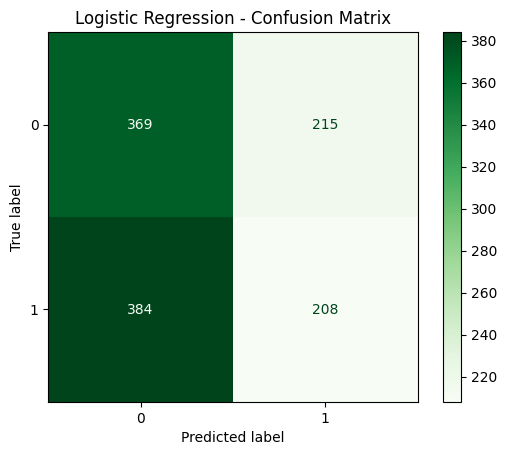

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

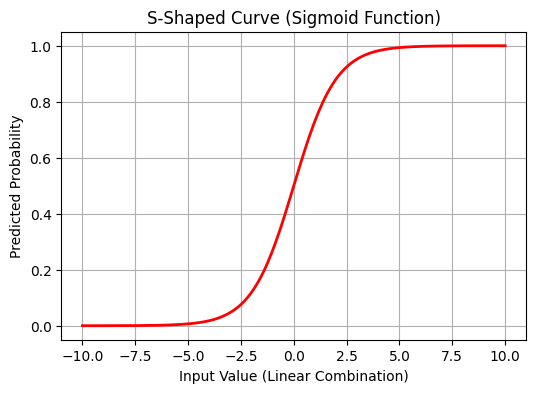

In [ ]:
x_vals = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-x_vals))

plt.figure(figsize=(6,4))
plt.plot(x_vals, sigmoid, color='red', linewidth=2)
plt.title('S-Shaped Curve (Sigmoid Function)')
plt.xlabel('Input Value (Linear Combination)')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.show()

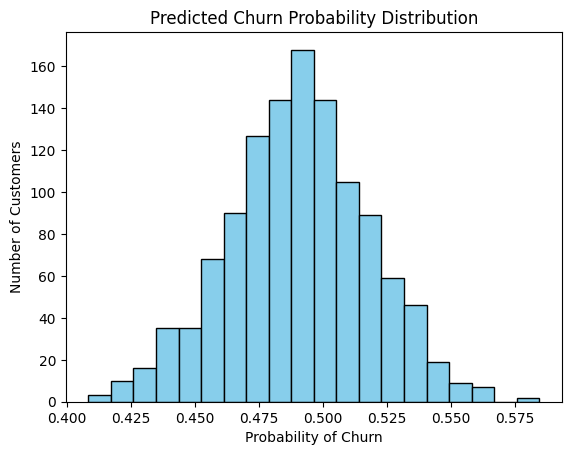

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
plt.hist(y_prob, bins=20, color='skyblue', edgecolor='black')
plt.title('Predicted Churn Probability Distribution')
plt.xlabel('Probability of Churn')
plt.ylabel('Number of Customers')
plt.show()